<a href="https://colab.research.google.com/github/lexoz-bedra/image_processing/blob/main/Prokudin_Gorsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stepik version

In [ ]:
# for stepik (DO NOT LAUNCH)

from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
from numpy import dstack, roll

def align(img, g_coord):
  # dividing channels
  g_row, g_col = g_coord
  b = img[:img.shape[0] // 3, :]
  g = img[img.shape[0] // 3:img.shape[0] // 3 * 2, :]
  g_row -= img.shape[0] // 3
  r = img[img.shape[0] // 3 * 2:img.shape[0] // 3 * 3, :]

  # cropping channels
  b_cropped = b[int(b.shape[0] * 0.1):int(b.shape[0] * 0.9) + 1, int(b.shape[1] * 0.1):int(b.shape[1] * 0.9) + 1]
  g_cropped = g[int(g.shape[0] * 0.1):int(g.shape[0] * 0.9) + 1, int(g.shape[1] * 0.1):int(g.shape[1] * 0.9) + 1]
  r_cropped = r[int(r.shape[0] * 0.1):int(r.shape[0] * 0.9) + 1, int(r.shape[1] * 0.1):int(r.shape[1] * 0.9) + 1]

  # channels to float
  r_f = img_as_float(r_cropped)
  g_f = img_as_float(g_cropped)
  b_f = img_as_float(b_cropped)

  # moving blue channel
  max_correlation_bg = 0
  shift_b = (0, 0)
  for i in range(-15, 16):
    for j in range(-15, 16):
      b_ex_v = roll(b_f, i, 0)
      b_ex_h = roll(b_ex_v, j, 1)
      correlation = (b_ex_h * g_f).sum()
      if correlation > max_correlation_bg:
        max_correlation_bg = correlation
        shift_b = (i, j)

  b_row = g_row - shift_b[0]
  b_col = g_col - shift_b[1]  # calculating the blue point coords

  b_f_corr = roll(roll(b_f, shift_b[0], 0), shift_b[1], 1)  # creating the perfect channel

  #  moving red channel
  max_correlation_rg = 0
  shift_r = (0, 0)
  for i in range(-15, 16):
    for j in range(-15, 16):
      r_ex_v = roll(r_f, i, 0)
      r_ex_h = roll(r_ex_v, j, 1)
      correlation = (r_ex_h * g_f).sum()
      if correlation > max_correlation_rg:
        max_correlation_rg = correlation
        shift_r = (i, j)

  r_row = g_row - shift_r[0] + img.shape[0] // 3 * 2 + 1
  r_col = g_col - shift_r[1]  # coords of the red point

  r_f_corr = roll(roll(r_f, shift_r[0], 0), shift_r[1], 1)  # the best channel

  # combination
  img_combined = dstack((r_f_corr, g_f, b_f_corr))

  return (b_row, b_col), (r_row, r_col)

## To be launched

In [ ]:
!wget https://stepik.org/media/attachments/lesson/58182/00.png

--2023-03-04 14:53:16--  https://stepik.org/media/attachments/lesson/58182/00.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240241 (235K) [image/png]
Saving to: ‘00.png.1’

00.png.1            100%[===================>] 234.61K   463KB/s    in 0.5s    

2023-03-04 14:53:17 (463 KB/s) - ‘00.png.1’ saved [240241/240241]



In [ ]:
%matplotlib inline
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
from numpy import dstack, roll

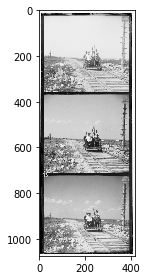

In [ ]:
img = imread('./00.png')
imshow(img)

150 237


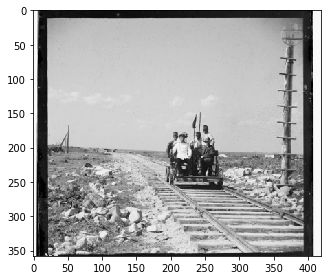

In [ ]:
g_coord = (508, 237)
g_row, g_col = g_coord
b = img[:img.shape[0] // 3, :]
g = img[img.shape[0] // 3:img.shape[0] // 3 * 2, :]
g_row -= img.shape[0] // 3
print(g_row, g_col)
r = img[img.shape[0] // 3 * 2:img.shape[0] // 3 * 3, :]
imshow(g)

(358, 419) (358, 419) (358, 419)


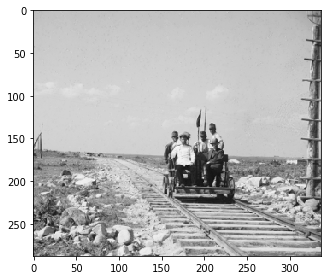

In [ ]:
b_cropped = b[int(b.shape[0] * 0.1):int(b.shape[0] * 0.9) + 1, int(b.shape[1] * 0.1):int(b.shape[1] * 0.9) + 1]
g_cropped = g[int(g.shape[0] * 0.1):int(g.shape[0] * 0.9) + 1, int(g.shape[1] * 0.1):int(g.shape[1] * 0.9) + 1]
r_cropped = r[int(r.shape[0] * 0.1):int(r.shape[0] * 0.9) + 1, int(r.shape[1] * 0.1):int(r.shape[1] * 0.9) + 1]
imshow(g_cropped)
print(r.shape, g.shape, b.shape)

In [ ]:
r_f = img_as_float(r_cropped)
g_f = img_as_float(g_cropped)
b_f = img_as_float(b_cropped)

57480.54989619377
(-3, 1)
153 236


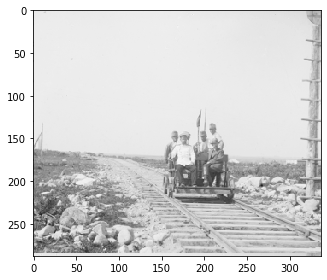

In [ ]:
max_correlation_bg = 0
shift_b = (0, 0)
for i in range(-15, 16):
  for j in range(-15, 16):
    b_ex_v = roll(b_f, i, 0)
    b_ex_h = roll(b_ex_v, j, 1)
    correlation = (b_ex_h * g_f).sum()
    if correlation > max_correlation_bg:
      max_correlation_bg = correlation
      shift_b = (i, j)
print(max_correlation_bg)
print(shift_b)
b_row = g_row - shift_b[0]
b_col = g_col - shift_b[1]
print(b_row, b_col)

b_f_corr = roll(roll(b_f, shift_b[0], 0), shift_b[1], 1)
imshow(b_f_corr)

858 238


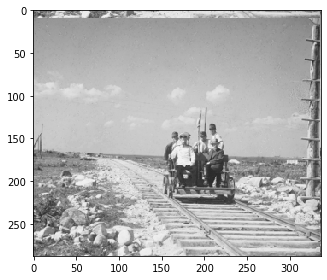

In [ ]:
max_correlation_rg = 0
shift_r = (0, 0)
for i in range(-15, 16):
  for j in range(-15, 16):
    r_ex_v = roll(r_f, i, 0)
    r_ex_h = roll(r_ex_v, j, 1)
    correlation = (r_ex_h * g_f).sum()
    if correlation > max_correlation_rg:
      max_correlation_rg = correlation
      shift_r = (i, j)
r_row = g_row - shift_r[0] + img.shape[0] // 3 * 2 + 1
r_col = g_col - shift_r[1]
print(r_row, r_col)

r_f_corr = roll(roll(r_f, shift_r[0], 0), shift_r[1], 1)
imshow(r_f_corr)

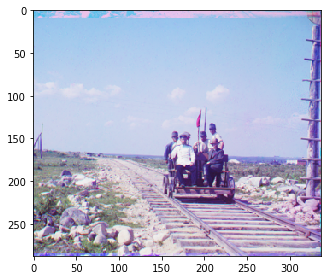

In [ ]:
img_combined = dstack((r_f_corr, g_f, b_f_corr))
imshow(img_as_ubyte(img_combined))

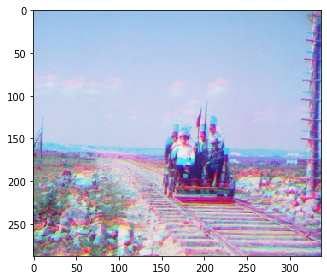

In [ ]:
imshow(dstack((r_f, g_f, b_f)))